In [1]:
## 導入所需的套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

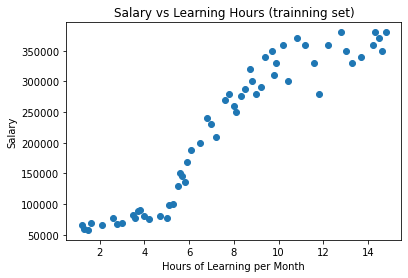

In [2]:
## 導入數據集
dataset = pd.read_csv("data/linear_regression_dataset_sample.csv")
X = dataset.iloc[:, 1].values.reshape(-1,1)
y = dataset.iloc[:,2].values
## 視覺化 數據集
plt.scatter(X, y)
plt.title('Salary vs Learning Hours (trainning set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()

In [3]:
## 將數據集拆成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 使用訓練集資料來訓練(擬和)迴歸模型
regressor = make_pipeline(PolynomialFeatures(6), LinearRegression())
regressor.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [4]:
## 迴歸模型的準確度
score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')


Score:  0.9694916994802747
Accuracy: 96.94916994802747%


In [5]:
## 拿訓練好的迴歸模型預測測試集資料的目標值(依變數)
y_pred = regressor.predict(X_test)
print('Predict : ', y_pred)


Predict :  [306927.65361694 303950.67378419 327806.58075872 234670.42529062
  70119.30917105  73169.12938504 297337.45449394 328025.61899288
 153428.19417922 330311.16772202  79820.57460623  69253.27960456
 267467.89772396 325312.37232658 289849.60698869 326146.30697963
 316674.05566826  70597.71334969]


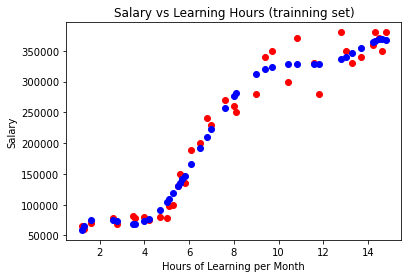

In [6]:
## 視覺化迴歸模型與訓練集的關聯
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_train, regressor.predict(X_train), color = 'blue')
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Learning Hours (trainning set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()


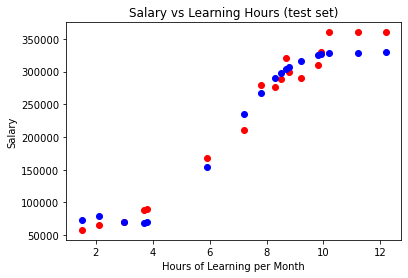

In [7]:

## 視覺化迴歸模型與測試集的關聯
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
#plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Learning Hours (test set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()